Implementation in Numpy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

**Step 1: Generate synthetic data**


In [13]:
n_samples = 100
X = np.linspace(0,10, n_samples).reshape(-1,1)
true_weight = 2.5 # true slope
true_bias = 1.0 # true intercept

noise = np.random.normal(0,0.5,n_samples) # gaussian noise with std=0.5
y = (X * true_weight + true_bias + noise).ravel() # target valuses with noise

In [7]:
# Add bias column (1s) to X for matrix multiplication
X_with_bias = np.hstack([np.ones((n_samples,1)), X]) # hstack : "stacks" arrays horizontally

# shape: (100, 2) 

**Step 2️a: Linear Regression via Normal Equation**

In [8]:
#Formula: θ = (XᵀX)^(-1) Xᵀy
weights_normal = np.linalg.solve(X_with_bias.T @ X_with_bias, X_with_bias.T @y)
y_pred_normal = X_with_bias @ weights_normal


**Step 2️b: Linear Regression via Gradient Descent**

In [15]:
weights_gd = np.zeros(2)           # Initialize weights: [bias, slope]
learning_rate = 0.01
n_iterations = 1000
cost_history = []

for _ in range(n_iterations):
    y_pred = X_with_bias @ weights_gd
    cost = (1 / (2 * n_samples)) * np.sum((y_pred - y.ravel()) ** 2)
    cost_history.append(cost)
    
    grad = (1 / n_samples) * X_with_bias.T @ (y_pred - y.ravel())
    weights_gd -= learning_rate * grad

y_pred_gd = X_with_bias @ weights_gd

ValueError: operands could not be broadcast together with shapes (100,) (10000,) 

Iteration 0: Loss = 16.6505, m = 0.0339, b = 0.0569
Iteration 100: Loss = 1.2546, m = 1.8982, b = 3.1733
Iteration 200: Loss = 0.1883, m = 2.3986, b = 3.9876

Final model: y = 2.54x + 4.20


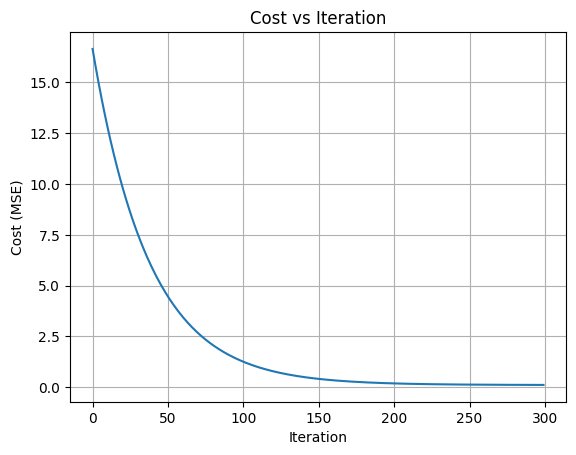

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate dummy data
X = np.random.rand(100, 1)
y = 3 * X.squeeze() + 4 + np.random.randn(100) * 0.5

# Step 2: Initialize parameters
m = 0.0  # slope
b = 0.0  # intercept
alpha = 0.01  # learning rate
n = 300  # total iterations
size = X.shape[0]

cost_history = []

# Step 3: Gradient Descent Loop
for i in range(n):
    y_pred = m * X.squeeze() + b
    error = y_pred - y

    # Compute gradients
    dm = (1 / size) * np.dot(error, X.squeeze())
    db = (1 / size) * np.sum(error)

    # Update parameters
    m -= alpha * dm
    b -= alpha * db

    # Compute and store loss
    loss = (1 / (2 * size)) * np.sum(error ** 2)
    cost_history.append(loss)

    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}, m = {m:.4f}, b = {b:.4f}")

# Step 4: Final Result
print(f"\nFinal model: y = {m:.2f}x + {b:.2f}")

# Step 5: Plot Cost vs Iteration
plt.plot(range(n), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iteration')
plt.grid(True)
plt.show()


Iteration 0: Loss = 16.1071, m = 0.0311, b = 0.0558
Iteration 100: Loss = 1.3727, m = 1.7860, b = 3.1641
Iteration 200: Loss = 0.2469, m = 2.2998, b = 4.0066
Iteration 300: Loss = 0.1593, m = 2.4690, b = 4.2244
Iteration 400: Loss = 0.1511, m = 2.5412, b = 4.2706
Iteration 500: Loss = 0.1491, m = 2.5850, b = 4.2703
Iteration 600: Loss = 0.1477, m = 2.6195, b = 4.2580
Iteration 700: Loss = 0.1466, m = 2.6499, b = 4.2432
Iteration 800: Loss = 0.1456, m = 2.6779, b = 4.2284
Iteration 900: Loss = 0.1447, m = 2.7039, b = 4.2143

Final model: y = 2.73x + 4.20


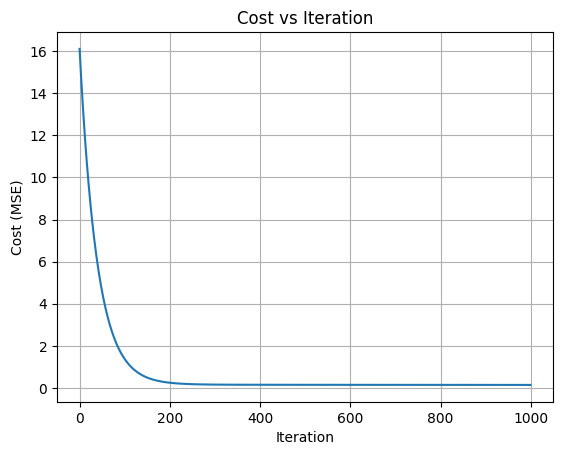

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate dummy data
X = np.random.rand(100, 1)
y = 3 * X.squeeze() + 4 + np.random.randn(100) * 0.5

# Step 2: Initialize parameters
m = 0.0  # slope
b = 0.0  # intercept
alpha = 0.01  # learning rate
n = 1000  # total iterations
size = X.shape[0]

cost_history = []

# Step 3: Gradient Descent Loop
for i in range(n):
    y_pred = m * X.squeeze() + b
    error = y_pred - y

    # Compute gradients
    dm = (1 / size) * np.dot(error, X.squeeze())
    db = (1 / size) * np.sum(error)

    # Update parameters
    m -= alpha * dm
    b -= alpha * db

    # Compute and store loss
    loss = (1 / (2 * size)) * np.sum(error ** 2)
    cost_history.append(loss)

    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss:.4f}, m = {m:.4f}, b = {b:.4f}")

# Step 4: Final Result
print(f"\nFinal model: y = {m:.2f}x + {b:.2f}")

# Step 5: Plot Cost vs Iteration
plt.plot(range(n), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iteration')
plt.grid(True)
plt.show()
